In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
import random
InteractiveShell.ast_node_interactivity = "all"
import os
from datetime import datetime
import matplotlib.pyplot as plt
#import plotly.express as px
import glob
from tqdm import tqdm

In [49]:
url = '../data/australia_old_prepared.csv'
aus_fires = pd.read_csv(url, parse_dates=['time'])
aus_fires.shape
aus_fires.head()

(423596, 10)

,latitude,longitude,time,fire_count,confidence,frp,est_fire_area,est_brightness,loc_count,ranking
0,-20.6,116.8,2017-05-08,1,74,14.1,1.1,317.7,211,0.321056
1,-20.8,115.4,2016-03-04,5,86,54.6,2.2,321.1,211,0.399909
2,-20.8,115.4,2016-02-01,2,66,20.2,1.9,303.5,211,0.307549
3,-20.8,115.4,2016-02-02,5,64,29.5,2.1,312.5,211,0.308842
4,-20.8,115.4,2016-02-03,5,84,34.4,1.9,314.3,211,0.384867


In [50]:
fire_copy.sort_values(by=['time'], ascending=False)

,latitude,longitude,time,fire_count,confidence,frp,est_fire_area,est_brightness,loc_count
42465,-33.7,120.1,2020-12-31,1,60,17.0,2.2,310.8,2
61058,-32.2,121.3,2020-12-31,1,64,46.2,3.1,315.4,3
59451,-32.3,116.2,2020-12-31,3,58,19.8,1.2,319.8,30
119771,-26.5,147.5,2020-12-31,1,89,32.3,1.0,323.8,16
33372,-34.3,116.7,2020-12-31,1,72,17.1,1.4,311.0,14
...,...,...,...,...,...,...,...,...,...
167299,-22.2,149.5,2015-01-01,3,78,40.3,1.0,324.5,61
408228,-12.2,142.8,2015-01-01,1,75,38.0,1.9,310.6,13
218181,-18.1,145.6,2015-01-01,1,79,64.8,1.3,320.8,10
211685,-18.5,139.6,2015-01-01,1,37,19.1,1.0,318.4,1


In [51]:
fire_copy.head(20)

,latitude,longitude,time,fire_count,confidence,frp,est_fire_area,est_brightness,loc_count
0,-43.5,146.2,2018-03-23,6,56,92.7,5.4,306.2,1
1,-43.5,146.8,2020-03-27,1,0,33.6,1.2,306.1,1
2,-43.5,146.9,2020-03-18,1,100,0.0,1.7,327.8,1
3,-43.4,146.9,2015-04-14,2,84,14.8,1.0,297.0,12
4,-43.4,146.9,2016-04-24,3,64,136.0,3.2,309.4,12
5,-43.4,146.9,2016-04-25,2,66,45.7,2.9,301.8,12
6,-43.4,146.9,2017-05-19,1,88,74.0,1.3,315.2,12
7,-43.4,146.9,2018-04-04,3,79,148.4,1.3,325.8,12
8,-43.4,146.9,2018-04-20,1,28,15.3,1.3,298.4,12
9,-43.4,146.9,2018-05-01,2,69,100.4,2.9,311.6,12


In [52]:
def filterLocation(aus_fires,latitude,longitude):
    filtered = aus_fires[(aus_fires.latitude == latitude)&(aus_fires.longitude == longitude)]
    return filtered

In [53]:
lat = -20.6
lng = 116.8
filtered = filterLocation(aus_fires,lat,lng)

In [54]:
filtered.head(25)

,latitude,longitude,time,fire_count,confidence,frp,est_fire_area,est_brightness,loc_count,ranking
0,-20.6,116.8,2017-05-08,1,74,14.1,1.1,317.7,211,0.321056
28,-20.6,116.8,2017-05-27,1,82,9.9,1.0,303.0,211,0.350808
29,-20.6,116.8,2017-08-02,1,62,17.3,1.4,307.4,211,0.279432
30,-20.6,116.8,2017-07-29,1,0,5.6,1.1,310.8,211,0.024723
31,-20.6,116.8,2017-07-28,1,58,6.6,1.1,298.4,211,0.256763
32,-20.6,116.8,2017-07-12,4,63,10.0,1.0,302.0,211,0.279574
33,-20.6,116.8,2017-07-03,1,59,9.9,1.0,305.3,211,0.258808
34,-20.6,116.8,2017-07-01,1,77,10.8,1.0,302.2,211,0.330844
35,-20.6,116.8,2017-06-24,2,52,9.8,1.1,298.1,211,0.234475
36,-20.6,116.8,2017-06-21,1,0,34.3,2.5,303.8,211,0.055014


In [55]:
# TIME SERIES

In [56]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings('ignore')

from kats.consts import TimeSeriesData

In [57]:
aus_fires = TimeSeriesData(filtered)

In [58]:
print(type(aus_fires.time))
print(type(aus_fires.value.ranking))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [59]:
aus_fires = TimeSeriesData(time=filtered.time, value=filtered.ranking)

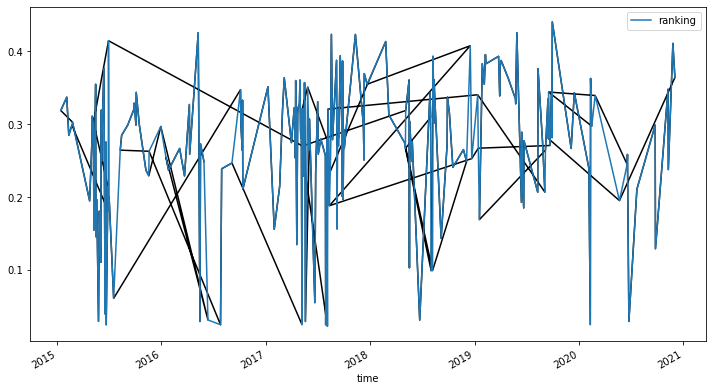

In [61]:
%matplotlib inline

# Must pass the name of the value columns to plot
aus_fires.plot(cols=['ranking'])
plt.show()